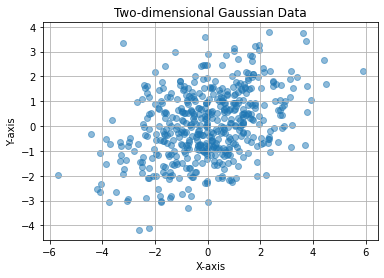

In [0]:
# Work Through the Steps of PCA on a Sample Dataset

import numpy as np
import matplotlib.pyplot as plt

# Generate 2D Gaussian Data
np.random.seed(42)
mean = [0, 0]
cov = [[3, 1], [1, 2]]
data = np.random.multivariate_normal(mean, cov, 500)

# Visualization 1: Two-dimensional Gaussians
plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
plt.title('Two-dimensional Gaussian Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

# Standardize data
data_mean = np.mean(data, axis=0)
data_centered = data - data_mean

# Covariance matrix
cov_matrix = np.cov(data_centered.T)

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Project data onto principal components
projected_data = np.dot(data_centered, eigenvectors[:, :2])


In [0]:
# Writing a PCA Function and Evaluating PCA on Sample Datasets
# PCA Function
def custom_pca(data, n_components):
    data_centered = data - np.mean(data, axis=0)
    cov_matrix = np.cov(data_centered.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    top_components = eigenvectors[:, sorted_indices[:n_components]]
    reduced_data = np.dot(data_centered, top_components)
    return reduced_data, top_components

# Generate 3D Data
np.random.seed(42)
data_3d = np.random.rand(500, 3) * 10

# Apply PCA to 3D data
projected_data_2d, _ = custom_pca(data_3d, 2)

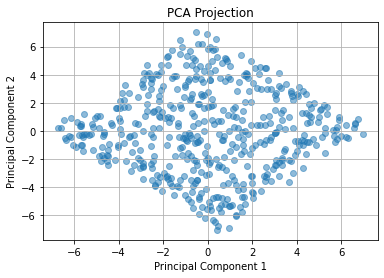

In [0]:
# Visualization 2: PCA Projection
plt.scatter(projected_data_2d[:, 0], projected_data_2d[:, 1], alpha=0.5)
plt.title('PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


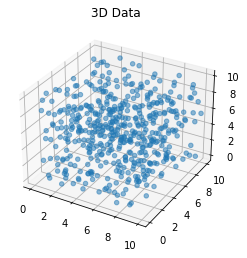

In [0]:
# Visualization 3: Three-dimensional data
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], alpha=0.5)
plt.title('3D Data')
plt.show()

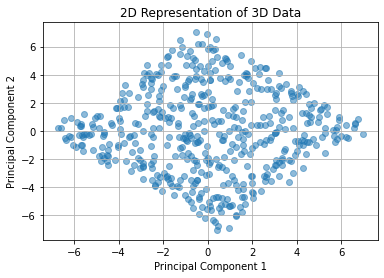

In [0]:
# Visualization 4: 2D Representation of 3D Data
plt.scatter(projected_data_2d[:, 0], projected_data_2d[:, 1], alpha=0.5)
plt.title('2D Representation of 3D Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [0]:
# Parse, Inspect, and Preprocess Neuroscience Data
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Load Digits dataset
digits = load_digits()
data = digits.data
images = digits.images

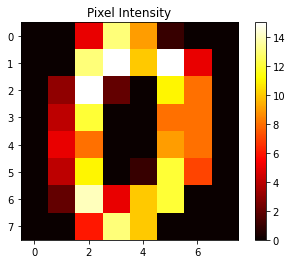

In [0]:
# Visualization 5: Pixel intensity
plt.imshow(images[0], cmap='hot', interpolation='nearest')
plt.title('Pixel Intensity')
plt.colorbar()
plt.show()

In [0]:
# Normalize data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

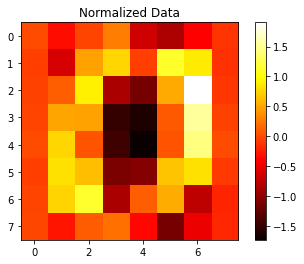

In [0]:
# Visualization 6: Normalized data
plt.imshow(normalized_data[0].reshape(8, 8), cmap='hot', interpolation='nearest')
plt.title('Normalized Data')
plt.colorbar()
plt.show()

In [0]:
# Perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_data)

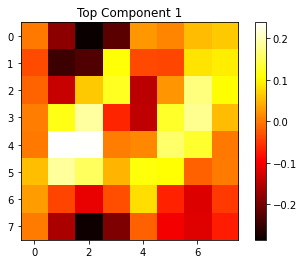

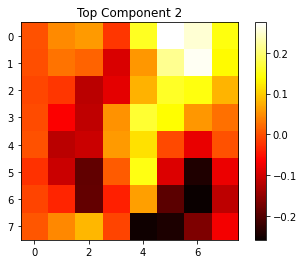

In [0]:
# Visualization 7: Top two components as images
plt.imshow(pca.components_[0].reshape(8, 8), cmap='hot')
plt.title('Top Component 1')
plt.colorbar()
plt.show()

plt.imshow(pca.components_[1].reshape(8, 8), cmap='hot')
plt.title('Top Component 2')
plt.colorbar()
plt.show()


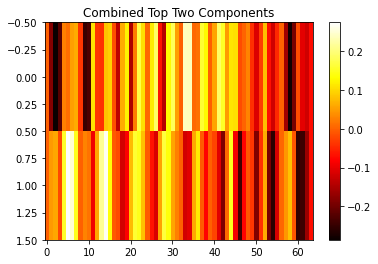

In [0]:
# Visualization 8: Combined image of top components
combined_components = np.vstack(pca.components_[:2])
plt.imshow(combined_components, cmap='hot', aspect='auto')
plt.title('Combined Top Two Components')
plt.colorbar()
plt.show()

In [0]:
pip install yfinance


Python interpreter will be restarted.
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  ERROR: Command errored out with exit status 1:
   command: /local_disk0/.ephemeral_nfs/envs/pythonEnv-b947ae07-d0a0-4c5b-818b-84e275957534/bin/python /local_disk0/.ephemeral_nfs/envs/pythonEnv-b947ae07-d0a0-4c5b-818b-84e275957534/lib/python3.9/site-packages/pip/_vendor/pep517/in_process/_in_process.py get_requires_for_build_wheel /tmp/tmp0t5ed8tc
       cwd: /tmp/pip-install-6me1yqxb/peewee_ffa1bb1739614534862fd5fe8f73e385
  Complete output (38 lines):
  
  Error compiling Cython file:
  ------------------------------------------------------------
  ...
  
  
  # We define an xConnect function, but leave xCreate NULL so that the
  # table-function can be called eponymously.
  cdef int pwConnect(sqlite3 *db, void *pAux, int argc, cons

In [0]:
import yfinance as yf
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Fetch stock data
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']
stock_data = yf.download(tickers, start='2022-01-01', end='2023-01-01')['Adj Close']

# Fill missing data
stock_data.fillna(method='ffill', inplace=True)

# Aggregate by time (weekly)
stock_data_weekly = stock_data.resample('W').mean()

# Normalize data
scaler = StandardScaler()
stock_data_scaled = scaler.fit_transform(stock_data_weekly)

[*********************100%%**********************]  4 of 4 completed


In [0]:
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(stock_data_scaled)

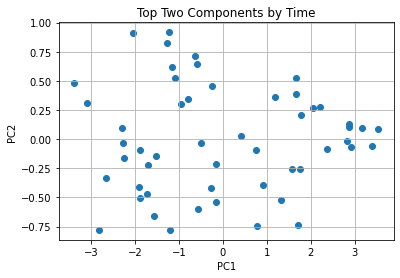

In [0]:
# Visualization 9: Top two components by time
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('Top Two Components by Time')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

In [0]:
# Simulate grouping by direction
directions = ['Up', 'Down'] * (len(stock_data_weekly) // 2)
direction_labels = pd.Series(directions)

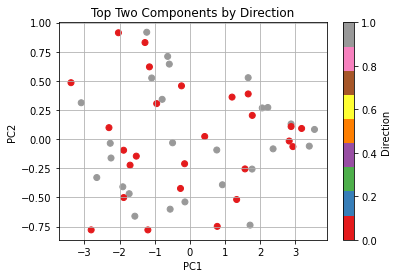

In [0]:
# Visualization 10: Top two components by direction
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=direction_labels.astype('category').cat.codes, cmap='Set1')
plt.title('Top Two Components by Direction')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Direction')
plt.grid(True)
plt.show()